## Preparing the dataset

In [ ]:
from google.colab import files
files.upload()

In [10]:
!rm -r ~/.kaggle

In [11]:
!mkdir ~/.kaggle

In [12]:
!mv ./kaggle.json ~/.kaggle/

In [13]:
!chmod 600 ~/.kaggle/kaggle.json

In [14]:
!kaggle datasets download -d gpiosenka/100-bird-species

100% 1.95G/1.96G [00:58<00:00, 42.2MB/s]
100% 1.96G/1.96G [00:58<00:00, 35.7MB/s]


In [15]:
import zipfile
zip_ref = zipfile.ZipFile('100-bird-species.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
import os
for dirpath, dirnames, filenames in os.walk("train"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 525 directories and 0 images in 'train'
There are 0 directories and 132 images in 'train/ORANGE BRESTED BUNTING'
There are 0 directories and 211 images in 'train/WOOD THRUSH'
There are 0 directories and 141 images in 'train/AZURE BREASTED PITTA'
There are 0 directories and 198 images in 'train/CRIMSON SUNBIRD'
There are 0 directories and 213 images in 'train/CASPIAN TERN'
There are 0 directories and 193 images in 'train/ROSEATE SPOONBILL'
There are 0 directories and 154 images in 'train/EURASIAN MAGPIE'
There are 0 directories and 130 images in 'train/PATAGONIAN SIERRA FINCH'
There are 0 directories and 158 images in 'train/GOLDEN PIPIT'
There are 0 directories and 154 images in 'train/BRANDT CORMARANT'
There are 0 directories and 165 images in 'train/AZURE TIT'
There are 0 directories and 144 images in 'train/CRAB PLOVER'
There are 0 directories and 155 images in 'train/HOATZIN'
There are 0 directories and 233 images in 'train/D-ARNAUDS BARBET'
There are 0 directories and 16

In [17]:
import os
for dirpath, dirnames, filenames in os.walk("test"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 525 directories and 0 images in 'test'
There are 0 directories and 5 images in 'test/ORANGE BRESTED BUNTING'
There are 0 directories and 5 images in 'test/WOOD THRUSH'
There are 0 directories and 5 images in 'test/AZURE BREASTED PITTA'
There are 0 directories and 5 images in 'test/CRIMSON SUNBIRD'
There are 0 directories and 5 images in 'test/CASPIAN TERN'
There are 0 directories and 5 images in 'test/ROSEATE SPOONBILL'
There are 0 directories and 5 images in 'test/EURASIAN MAGPIE'
There are 0 directories and 5 images in 'test/PATAGONIAN SIERRA FINCH'
There are 0 directories and 5 images in 'test/GOLDEN PIPIT'
There are 0 directories and 5 images in 'test/BRANDT CORMARANT'
There are 0 directories and 5 images in 'test/AZURE TIT'
There are 0 directories and 5 images in 'test/CRAB PLOVER'
There are 0 directories and 5 images in 'test/HOATZIN'
There are 0 directories and 5 images in 'test/D-ARNAUDS BARBET'
There are 0 directories and 5 images in 'test/BLACK-THROATED SPARROW'
The

In [18]:
training_samples = 0
for dirpath, dirnames, filenames in os.walk("train"):
  training_samples+=len(filenames)
print(f"The number of training samples: {training_samples}")

The number of training samples: 84635


In [19]:
testing_samples = 0
for dirpath, dirnames, filenames in os.walk("test"):
  testing_samples+=len(filenames)
print(f"The number of testing samples: {testing_samples}")

The number of testing samples: 2625


In [20]:
validation_samples = 0
for dirpath, dirnames, filenames in os.walk("valid"):
  validation_samples+=len(filenames)
print(f"The number of validation samples: {validation_samples}")

The number of validation samples: 2625


In [21]:
train_dir = "train"
test_dir = "test"
valid_dir = "valid"

In [22]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode='categorical',
                                                                 batch_size=32,
                                                                 shuffle=True) # SHUFFLING!
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode='categorical',
                                                                shuffle=False)
valid_data = tf.keras.preprocessing.image_dataset_from_directory(directory=valid_dir,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode='categorical',
                                                                shuffle=False)

Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.


In [23]:
print(train_data.class_names)

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN DIPPER', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMERICAN ROBIN', 'AMERICAN WIGEON', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD', 'ASIAN GREEN BEE EATER', 'ASIAN OPENBILL STORK', 'AUCKLAND SHAQ', 'AUSTRAL CANASTERO', 'AUSTRALASIAN FIGBIRD', 'AVADAVAT', 'AZARAS SPINETAIL', 'AZURE BREASTED PITTA', 'AZURE JAY', 'AZURE TANAGER', '

In [24]:
for images, labels in train_data.take(1):
  print(images, labels)

tf.Tensor(
[[[[ 27.  57.  23.]
   [ 27.  57.  23.]
   [ 29.  56.  25.]
   ...
   [135. 147. 125.]
   [140. 154. 131.]
   [147. 161. 138.]]

  [[ 21.  51.  17.]
   [ 23.  53.  19.]
   [ 26.  53.  22.]
   ...
   [139. 151. 127.]
   [145. 159. 136.]
   [151. 165. 140.]]

  [[ 25.  56.  22.]
   [ 26.  57.  23.]
   [ 28.  58.  24.]
   ...
   [143. 156. 130.]
   [146. 160. 135.]
   [150. 164. 138.]]

  ...

  [[ 69. 107.  66.]
   [ 71. 109.  68.]
   [ 71. 109.  70.]
   ...
   [ 42.  97.  16.]
   [ 42.  97.  14.]
   [ 43.  98.  15.]]

  [[ 71. 108.  77.]
   [ 74. 111.  78.]
   [ 74. 111.  78.]
   ...
   [ 46. 100.  16.]
   [ 46. 100.  14.]
   [ 48. 102.  16.]]

  [[ 72. 108.  82.]
   [ 72. 108.  80.]
   [ 70. 106.  78.]
   ...
   [ 48. 102.  16.]
   [ 44.  98.  10.]
   [ 45.  99.  11.]]]


 [[[ 49.  90. 120.]
   [ 49.  90. 120.]
   [ 49.  90. 120.]
   ...
   [ 47.  92. 125.]
   [ 47.  92. 125.]
   [ 47.  92. 125.]]

  [[ 48.  89. 119.]
   [ 48.  89. 119.]
   [ 48.  89. 119.]
   ...
   [ 48.  

## Displaying random sample

(-0.5, 223.5, 223.5, -0.5)

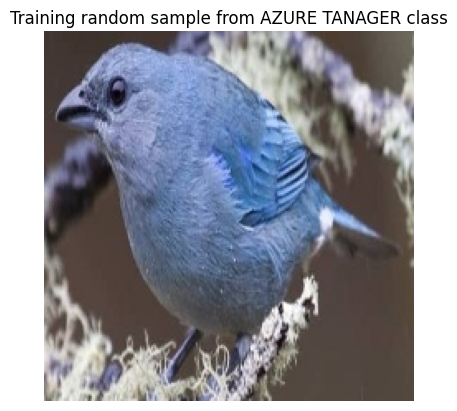

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
target_class = random.choice(train_data.class_names)
target_dir = "train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Training random sample from {target_class} class")
plt.axis(False)

In [26]:
img.shape

(224, 224, 3)

## Creating model with EfficientNetV2B0 (feature vector)

In [27]:
# Mixed precision training for faster training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")
print(mixed_precision.global_policy())

<Policy "mixed_float16">


In [28]:
from tensorflow.keras import layers
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=IMG_SIZE+(3,), name="input_layer")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="GAP2D")(x)
outputs = layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)

model_feature_extraction = tf.keras.Model(inputs, outputs)

24274472/24274472 [==============================] - 1s 0us/step


In [29]:
model_feature_extraction.compile(loss="categorical_crossentropy",
                                 optimizer=tf.keras.optimizers.Adam(),
                                 metrics=["accuracy"])
history_1 = model_feature_extraction.fit(train_data,
                             epochs=3,
                             steps_per_epoch=len(train_data),
                             validation_data=valid_data,
                             validation_steps=len(valid_data))

Epoch 1/3
2645/2645 [==============================] - 122s 42ms/step - loss: 1.0121 - accuracy: 0.8229 - val_loss: 0.2733 - val_accuracy: 0.9417
Epoch 2/3
2645/2645 [==============================] - 112s 42ms/step - loss: 0.2469 - accuracy: 0.9481 - val_loss: 0.1908 - val_accuracy: 0.9539
Epoch 3/3
2645/2645 [==============================] - 104s 39ms/step - loss: 0.1429 - accuracy: 0.9714 - val_loss: 0.1638 - val_accuracy: 0.9558


## Loss and Accuracy Curves

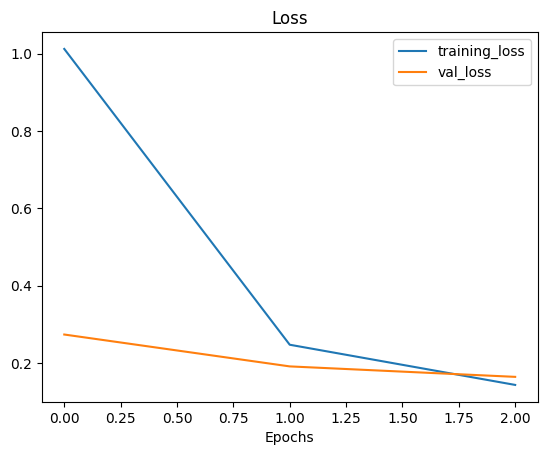

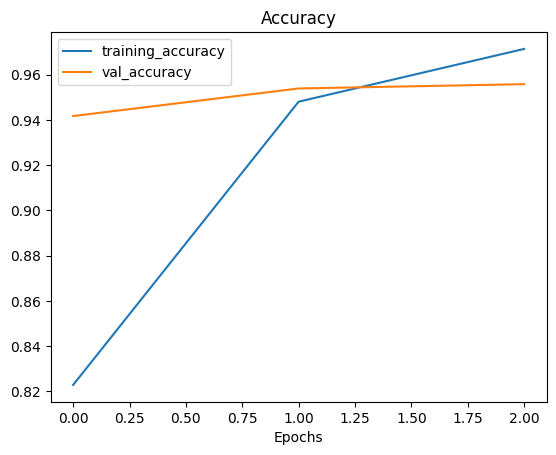

In [30]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

plot_loss_curves(model_feature_extraction.history)

In [31]:
model_feature_extraction.evaluate(test_data)

83/83 [==============================] - 4s 44ms/step - loss: 0.1010 - accuracy: 0.9764


[0.10100536793470383, 0.9763809442520142]

In [32]:
print(model_feature_extraction.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 GAP2D (GlobalAveragePoolin  (None, 1280)              0         
 g2D)                                                            
                                                                 
 output_layer (Dense)        (None, 525)               672525    
                                                                 
Total params: 6591837 (25.15 MB)
Trainable params: 672525 (2.57 MB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________
None


## Fine-tuning the model

In [33]:
for layer in model_feature_extraction.layers:
  layer.trainable = True
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetv2-b0 True float32 <Policy "mixed_float16">
GAP2D True float32 <Policy "mixed_float16">
output_layer True float32 <Policy "mixed_float16">


In [34]:
model_feature_extraction.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(0.0001),
                     metrics=["accuracy"])

In [35]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=2)

In [36]:
history_2 = model_feature_extraction.fit(train_data,
                             epochs=100,
                             steps_per_epoch=len(train_data),
                             validation_data=valid_data,
                             validation_steps=len(valid_data),
                             callbacks=[
                             early_stopping
                             ])

Epoch 1/100
2645/2645 [==============================] - 363s 117ms/step - loss: 0.1001 - accuracy: 0.9741 - val_loss: 0.1427 - val_accuracy: 0.9570
Epoch 2/100
2645/2645 [==============================] - 304s 115ms/step - loss: 0.0457 - accuracy: 0.9876 - val_loss: 0.1164 - val_accuracy: 0.9684
Epoch 3/100
2645/2645 [==============================] - 303s 115ms/step - loss: 0.0301 - accuracy: 0.9913 - val_loss: 0.1193 - val_accuracy: 0.9703


In [37]:
def compare_historys(original_history, new_history, initial_epochs=5):
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # Make plot for accuracy
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Val Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")

  # Make plot for loss
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss, label="Training Loss")
  plt.plot(total_val_loss, label="Val Loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")

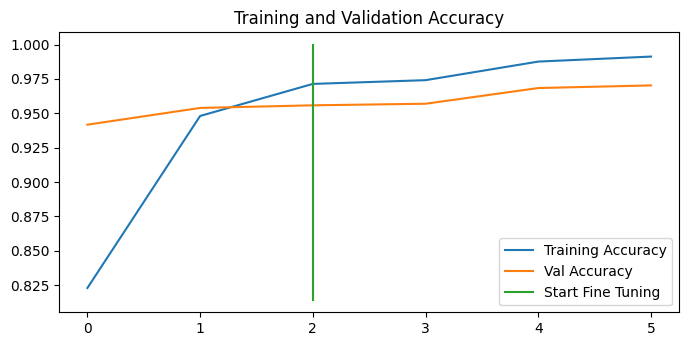

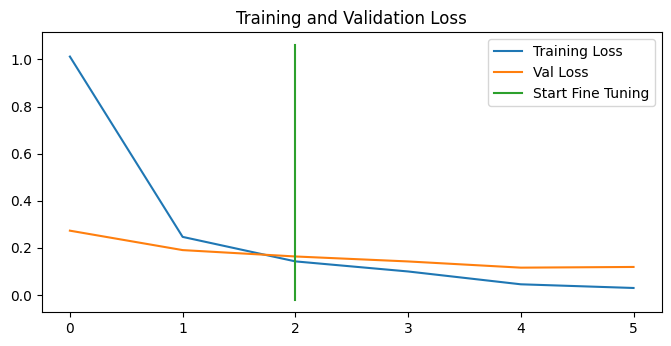

In [38]:
compare_historys(history_1, history_2, initial_epochs=3)

In [39]:
model_feature_extraction.evaluate(test_data)

83/83 [==============================] - 3s 35ms/step - loss: 0.0602 - accuracy: 0.9798


[0.060171376913785934, 0.9798095226287842]

In [40]:
print(model_feature_extraction.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 GAP2D (GlobalAveragePoolin  (None, 1280)              0         
 g2D)                                                            
                                                                 
 output_layer (Dense)        (None, 525)               672525    
                                                                 
Total params: 6591837 (25.15 MB)
Trainable params: 6531229 (24.91 MB)
Non-trainable params: 60608 (236.75 KB)
_________________________________________________________________
None


## Confusion matrix

In [41]:
pred_probs = model_feature_extraction.predict(test_data)
print(pred_probs)

83/83 [==============================] - 5s 37ms/step
[[1.874e-01 0.000e+00 0.000e+00 ... 0.000e+00 5.960e-08 0.000e+00]
 [3.274e-01 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 5.960e-08]
 [9.893e-01 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]]


In [42]:
preds = pred_probs.argmax(axis=-1)
print(preds)

[ 32 224   0 ... 524 524 524]


In [56]:
true = []
for image, label in test_data.unbatch():
  true.append(label.numpy().argmax(axis=-1))

In [ ]:
import numpy as np
true = np.array(true)
print(true)

In [57]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]


  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])


  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)


  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()


  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  if savefig:
    fig.savefig("confusion_matrix.png")

In [ ]:
#make_confusion_matrix(y_true=true,
                     #y_pred=preds,
                     # classes=train_data.class_names,
                     # figsize=(100,100),
                     # text_size=20
                     # )

In [47]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [48]:
accuracy = accuracy_score(true, preds)
precision, recall, f1_score, _ = precision_recall_fscore_support(true, preds, average="weighted")

In [49]:
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-score: {f1_score}")

Accuracy: 0.9798095238095238
Precision: 0.983904761904762
Recall: 0.9798095238095238
F1-score: 0.9791611457325744


## F1-score for all classes

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_true=true,
                            y_pred=preds))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      0.80      0.89         5
          12       0.83      1.00      0.91         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         5
          17       1.00    

In [51]:
classification_report_dict = classification_report(true, preds, output_dict=True)
print(classification_report_dict)

{'0': {'precision': 1.0, 'recall': 0.4, 'f1-score': 0.5714285714285715, 'support': 5}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5}, '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5}, '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5}, '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5}, '8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5}, '9': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5}, '10': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5}, '11': {'precision': 1.0, 'recall': 0.8, 'f1-score': 0.888888888888889, 'support': 5}, '12': {'precision': 0.8333333333333334, 'recall': 1.0, 'f1-score': 0.9090909090909091, 'support': 5}, '13': {'precis

In [52]:
class_f1_scores = {}

for k, v in classification_report_dict.items():
  if k == "accuracy":
    break
  else:
    class_f1_scores[train_data.class_names[int(k)]] = v["f1-score"]
print(class_f1_scores)

{'ABBOTTS BABBLER': 0.5714285714285715, 'ABBOTTS BOOBY': 1.0, 'ABYSSINIAN GROUND HORNBILL': 1.0, 'AFRICAN CROWNED CRANE': 1.0, 'AFRICAN EMERALD CUCKOO': 1.0, 'AFRICAN FIREFINCH': 1.0, 'AFRICAN OYSTER CATCHER': 1.0, 'AFRICAN PIED HORNBILL': 1.0, 'AFRICAN PYGMY GOOSE': 1.0, 'ALBATROSS': 1.0, 'ALBERTS TOWHEE': 1.0, 'ALEXANDRINE PARAKEET': 0.888888888888889, 'ALPINE CHOUGH': 0.9090909090909091, 'ALTAMIRA YELLOWTHROAT': 1.0, 'AMERICAN AVOCET': 1.0, 'AMERICAN BITTERN': 1.0, 'AMERICAN COOT': 1.0, 'AMERICAN DIPPER': 1.0, 'AMERICAN FLAMINGO': 1.0, 'AMERICAN GOLDFINCH': 0.9090909090909091, 'AMERICAN KESTREL': 1.0, 'AMERICAN PIPIT': 1.0, 'AMERICAN REDSTART': 1.0, 'AMERICAN ROBIN': 1.0, 'AMERICAN WIGEON': 0.9090909090909091, 'AMETHYST WOODSTAR': 1.0, 'ANDEAN GOOSE': 1.0, 'ANDEAN LAPWING': 1.0, 'ANDEAN SISKIN': 1.0, 'ANHINGA': 1.0, 'ANIANIAU': 1.0, 'ANNAS HUMMINGBIRD': 1.0, 'ANTBIRD': 0.9090909090909091, 'ANTILLEAN EUPHONIA': 1.0, 'APAPANE': 1.0, 'APOSTLEBIRD': 1.0, 'ARARIPE MANAKIN': 1.0, 'ASHY ST

In [53]:
import pandas as pd
pd.set_option('display.max_columns', None)
f1_scores = pd.DataFrame({"class_names": list(class_f1_scores.keys()),
              "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)

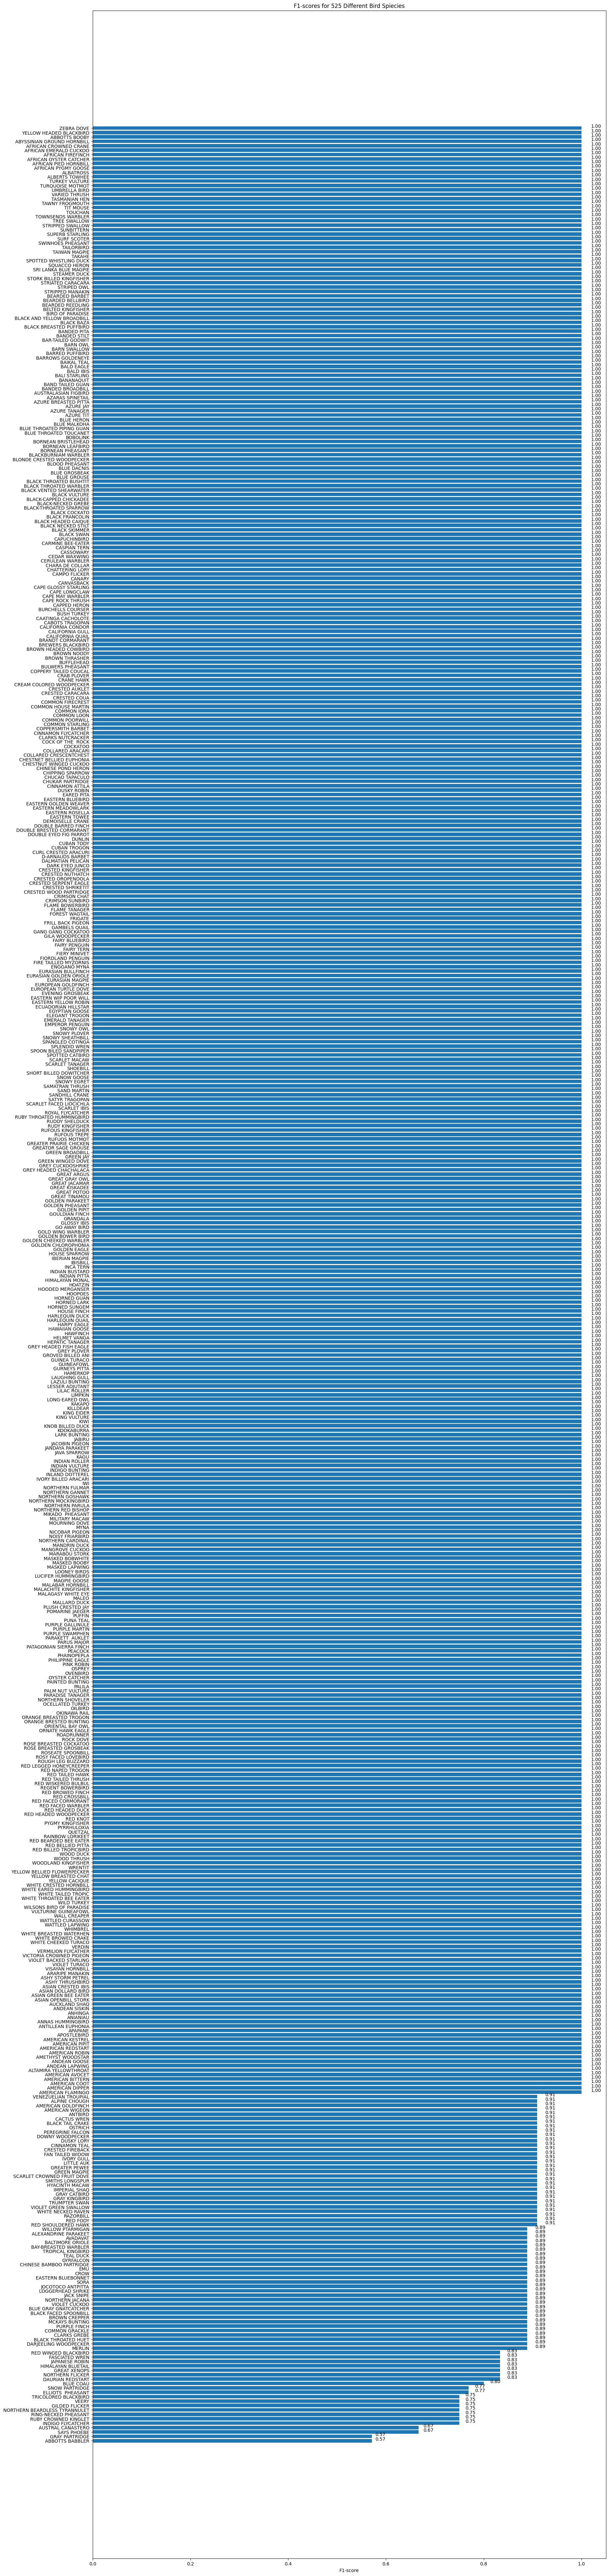

In [54]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,100))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores["class_names"])
ax.set_xlabel("F1-score")
ax.set_title("F1-scores for 525 Different Bird Spiecies")
ax.invert_yaxis()

def autolabel(rects):
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

## Predicting on Custom Images

In [ ]:
files.upload()

In [119]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  plt.imshow(img/255.)
  return img

1/1 [==============================] - 0s 72ms/step


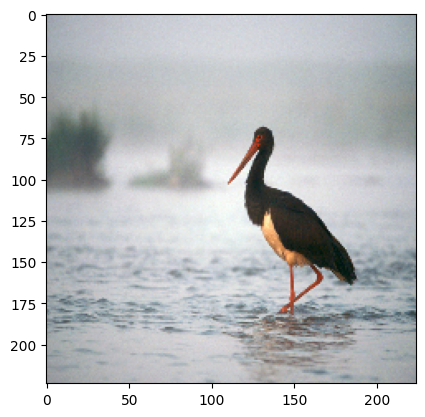

In [136]:
filepath="/content/bocian.jpg"
img = load_and_prep_image(filepath)
pred_prob = model_feature_extraction.predict(tf.expand_dims(img, axis=0))
pred_class = train_data.class_names[pred_prob.argmax()]

In [137]:
print(f"Predicted species: {pred_class}, Probability: {pred_prob.max()*100:.2f}%")

Predicted species: BALD IBIS, Probability: 60.01%
